In [2]:
import os
print(os.getcwd())

d:\MLOps\customer-churn\experiments


In [3]:
os.chdir("../")

In [4]:
os.getcwd()

'd:\\MLOps\\customer-churn'

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("data\credit-card-customer-churn.csv")

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Observation 1: Need to remove RowNumber

In [7]:
df.CustomerId.nunique()

10000

In [8]:
df.shape

(10000, 14)

observation 2: All customers are unique

In [8]:
df.drop(columns=['CustomerId','RowNumber'],inplace=True)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [10]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Observation 3: No missing values present in the dataset.

In [12]:
df.duplicated().sum()

np.int64(0)

Observation 4: No duplicate values present in the dataset.

In [13]:
df.head(1)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [11]:
numerical_cols=df.select_dtypes(exclude='object').columns
categorical_cols=df.select_dtypes(include='object').columns
print("Numerical Columns are: ",numerical_cols)
print("Categorical Columns are: ",categorical_cols)

Numerical Columns are:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Categorical Columns are:  Index(['Surname', 'Geography', 'Gender'], dtype='object')


Observation 5:: Three boolean columns present in the dataset HasCrCard, IsActiveMember and Exited

In [12]:
boolean_cols=['HasCrCard','IsActiveMember','Exited']
boolean_cols

['HasCrCard', 'IsActiveMember', 'Exited']

In [13]:
numerical_cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', ]
numerical_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

## Univariate Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

### Numerical Columns Univariate Analysis

In [21]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<Axes: ylabel='Frequency'>

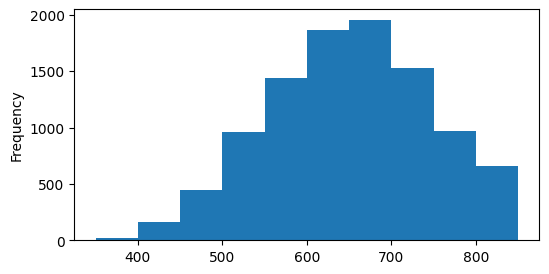

In [25]:
plt.figure(figsize=(6,3))
df['CreditScore'].plot(kind="hist")

<Axes: >

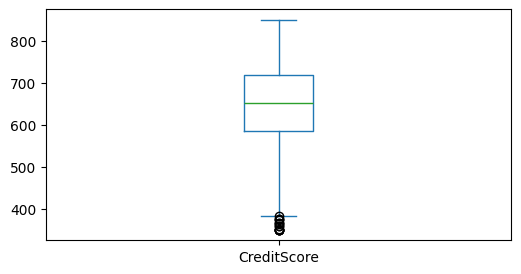

In [26]:
plt.figure(figsize=(6,3))
df['CreditScore'].plot(kind="box")

In [27]:
df[df['CreditScore']<=400]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,McMasters,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [57]:
df['CreditScore'].skew()

np.float64(-0.07160660820092675)

Conclusion
<li> Most of the customers having credit score of 600 to 700 </li>
<li> Outliers present in the dataset and all are exited </li>
<li> Normally distributed (almost) </li>

In [29]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

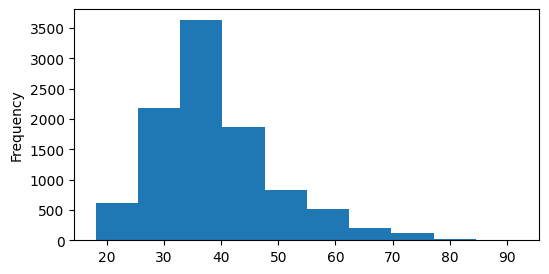

In [30]:
plt.figure(figsize=(6,3))
df['Age'].plot(kind="hist")

<Axes: >

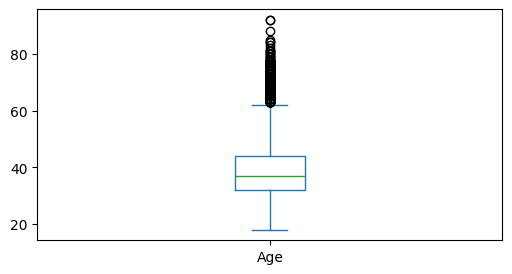

In [31]:
plt.figure(figsize=(6,3))
df['Age'].plot(kind="box")

In [38]:
df[df['Age']>=80]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
310,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0
766,Williamson,700,France,Female,82,2,0.00,2,0,1,182055.36,0
2458,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,Hickey,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
3994,Siciliano,809,Spain,Male,80,8,0.00,2,0,1,34164.05,0
4931,Hs?eh,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
6443,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


In [54]:
df['Age'].skew()

np.float64(1.0113202630234552)

Conclusion
<li> Most of the customers age lies in between 35 to 40</li>
<li> Outliers present in the age and customer having age>=80 are all active members (except one customer) and they didn't excited (except the customer who was inactive)</li>
<li> Positively skewed data </li>

In [43]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [42]:
df['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

<Axes: ylabel='Frequency'>

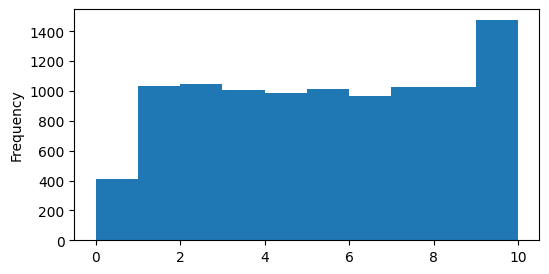

In [40]:
plt.figure(figsize=(6,3))
df['Tenure'].plot(kind="hist")

<Axes: >

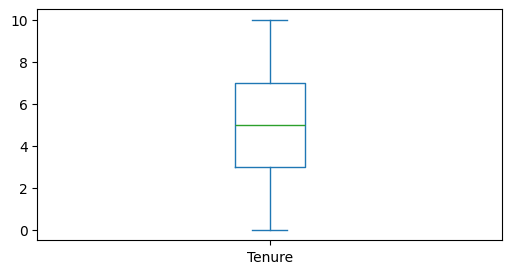

In [41]:
plt.figure(figsize=(6,3))
df['Tenure'].plot(kind="box")

In [55]:
df['Tenure'].skew()

np.float64(0.01099145797717904)

Conclusion:
<li> Most of the Tenure lies between 1 to 9</li>
<li> Maximum Tenure frequency lies between 9 to 10</li>
<li> Minimum Tenure frequency lies between 0 to 1</li>
<li> No Outliers</li>
<li> Normally distributed</li>

In [46]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

<Axes: ylabel='Frequency'>

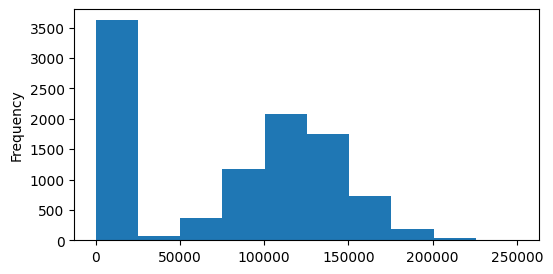

In [47]:
plt.figure(figsize=(6,3))
df['Balance'].plot(kind="hist")

<Axes: >

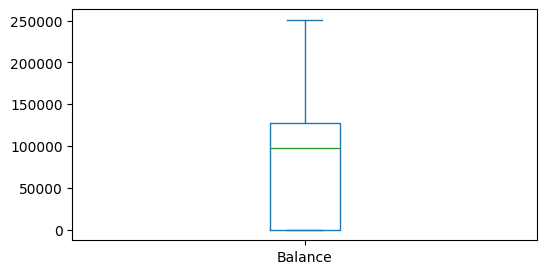

In [48]:
plt.figure(figsize=(6,3))
df['Balance'].plot(kind="box")

In [56]:
df['Balance'].skew()

np.float64(-0.14110871094154384)

Conclusion:
<li> Maximum balance is: 250898.0 , minimum balance is 0.0</li>
<li> Many customers are having balance=0</li>
<li> Most of the customers having balance between 75k to 1.5lakh</li>
<li> No outliers</li>
<li> Almost Normally distributed( slightly -ve)</li>

In [50]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<Axes: ylabel='Frequency'>

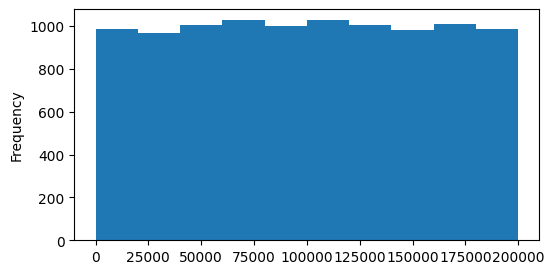

In [51]:
plt.figure(figsize=(6,3))
df['EstimatedSalary'].plot(kind="hist")

<Axes: >

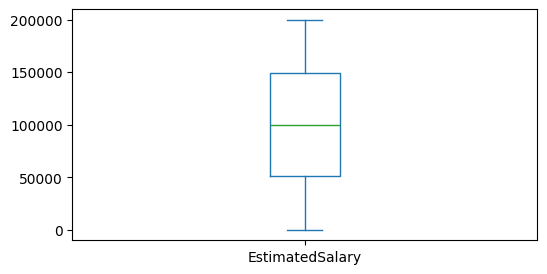

In [52]:
plt.figure(figsize=(6,3))
df['EstimatedSalary'].plot(kind="box")

In [53]:
df['EstimatedSalary'].skew()

np.float64(0.0020853576615585162)

Conclusions:
<li> Minimum estimated salary is 11 and maximum is 2 lakh(approx)</li>
<li> No outliers</li>
<li> Normally distributed</li>

### Categorical Columns Univariate Analysis

In [15]:
categorical_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [16]:
df['Surname'].nunique()

2932

<Axes: ylabel='count'>

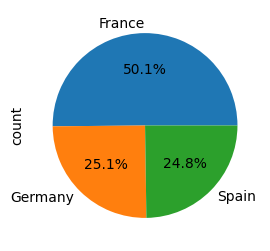

In [20]:
plt.figure(figsize=(6,3))
df['Geography'].value_counts().plot(kind='pie',autopct="%1.1f%%")

<Axes: ylabel='count'>

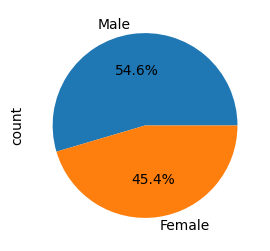

In [23]:
plt.figure(figsize=(6,3))
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [24]:
categorical_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [25]:
boolean_cols

['HasCrCard', 'IsActiveMember', 'Exited']

<Axes: xlabel='HasCrCard'>

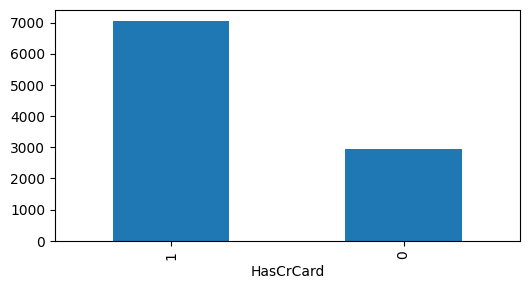

In [28]:
plt.figure(figsize=(6,3))
df['HasCrCard'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

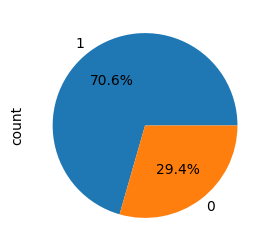

In [29]:
plt.figure(figsize=(6,3))
df['HasCrCard'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='IsActiveMember'>

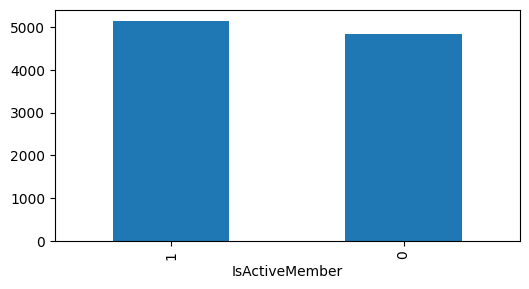

In [31]:
plt.figure(figsize=(6,3))
df['IsActiveMember'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

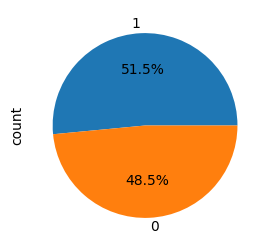

In [32]:
plt.figure(figsize=(6,3))
df['IsActiveMember'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Exited'>

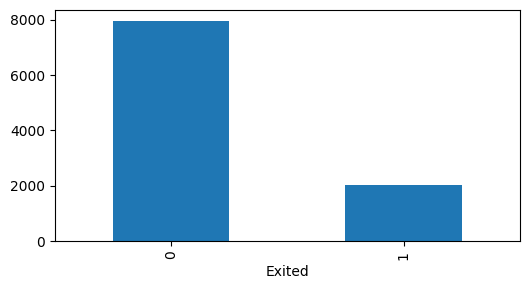

In [34]:
plt.figure(figsize=(6,3))
df['Exited'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

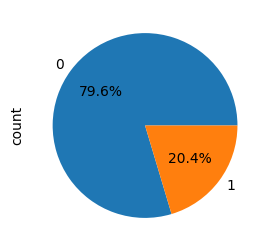

In [35]:
plt.figure(figsize=(6,3))
df['Exited'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Conclusion:
<li> Dataset is highly imbalanced(maybe SMOTE technique need to apply) </li>
<li> Only 20% of the customer exited </li>
<li> Active and Inactive customers percentage is almost same(50%). </li>
<li> Approximately 70% of the customers has credit card </li>
<li> Approximately 54% of the customers are male </li>
<li> Almost 50% customers are from France and 25% customers from Germeny and 25% from Spain  </li>

## Numerical - Categorical Bivariate Analysis

In [37]:
numerical_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

<Axes: ylabel='Density'>

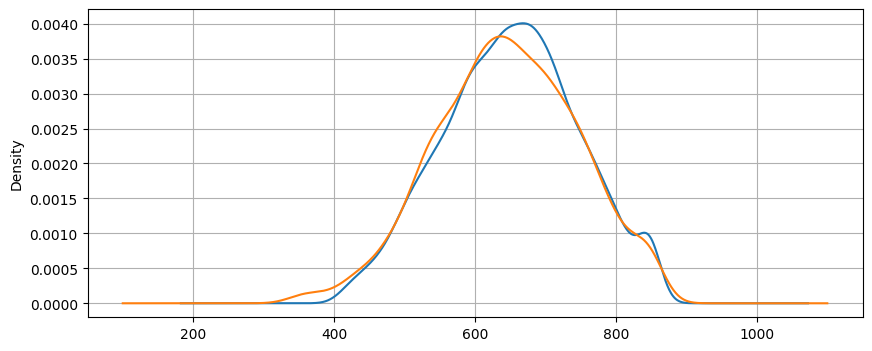

In [41]:
plt.figure(figsize=(10,4))
df[df['Exited']==0]['CreditScore'].plot(kind='kde',grid=True)
df[df['Exited']==1]['CreditScore'].plot(kind='kde',grid=True)

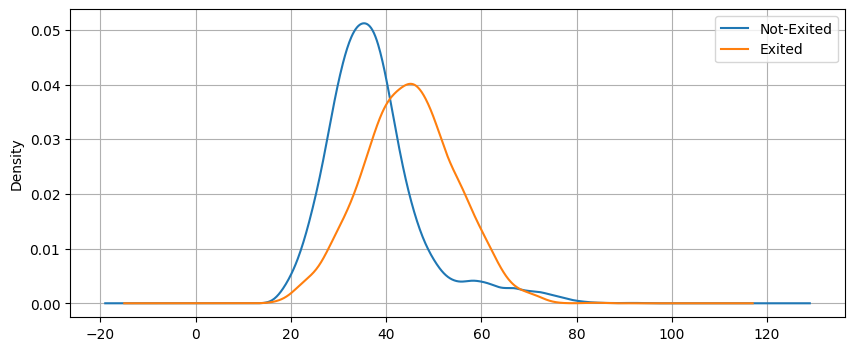

In [43]:
plt.figure(figsize=(10,4))
df[df['Exited']==0]['Age'].plot(kind='kde',grid=True,label='Not-Exited')
df[df['Exited']==1]['Age'].plot(kind='kde',grid=True,label='Exited')
plt.legend()
plt.show()

Conclusion
<li>Age between 20 to 40, the exited % is very lower than exited</li>
<li>Age between 40 to 70, the exited % is very higher</li>

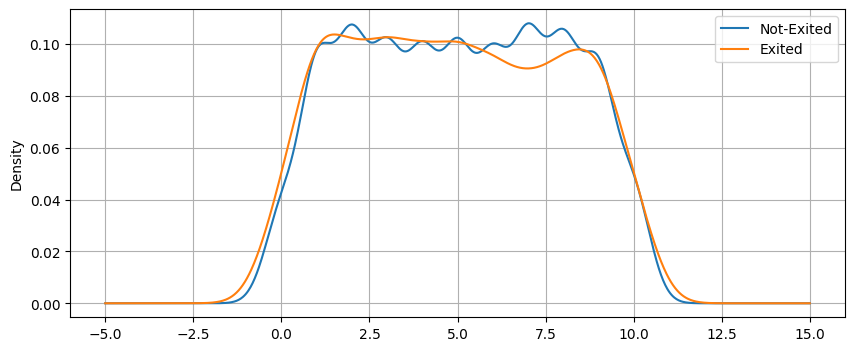

In [45]:
plt.figure(figsize=(10,4))
df[df['Exited']==0]['Tenure'].plot(kind='kde',grid=True,label='Not-Exited')
df[df['Exited']==1]['Tenure'].plot(kind='kde',grid=True,label='Exited')
plt.legend()
plt.show()

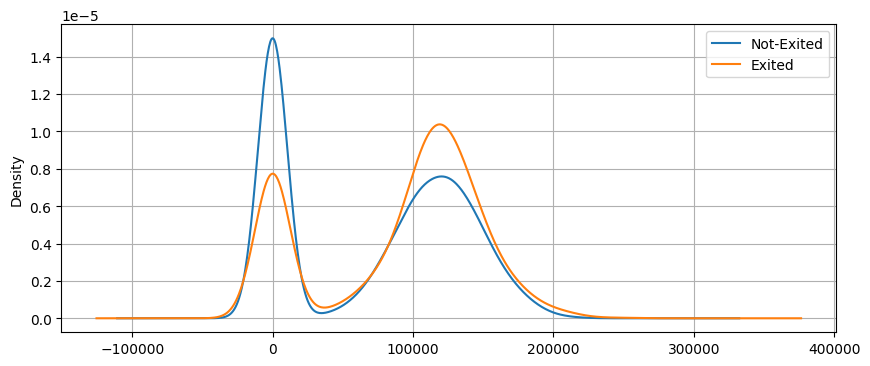

In [47]:
plt.figure(figsize=(10,4))
df[df['Exited']==0]['Balance'].plot(kind='kde',grid=True,label='Not-Exited')
df[df['Exited']==1]['Balance'].plot(kind='kde',grid=True,label='Exited')
plt.legend()
plt.show()

Conclusions
<li>Customers Having balance 0, the exited pertange is very low </li>
<li>Customers Having balance 1,00,000 to 1,50,000, the exited pertange is very high </li>


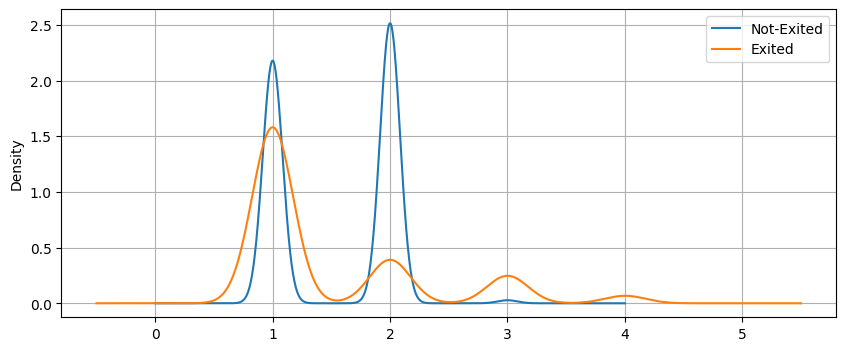

In [49]:
plt.figure(figsize=(10,4))
df[df['Exited']==0]['NumOfProducts'].plot(kind='kde',grid=True,label='Not-Exited')
df[df['Exited']==1]['NumOfProducts'].plot(kind='kde',grid=True,label='Exited')
plt.legend()
plt.show()

In [50]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Conclusion:
<li> Most of the customers has only 1 or 2 products</li>
<li> Only few customers has only 3 or 4 products</li>
<li> NumOfProducts Can be a categorical columns</li>

In [51]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

Concusions:
<li>It can also be a categorical column</li>
<li>Tenure frequency lower for 0 and 10 but others are higher</li>

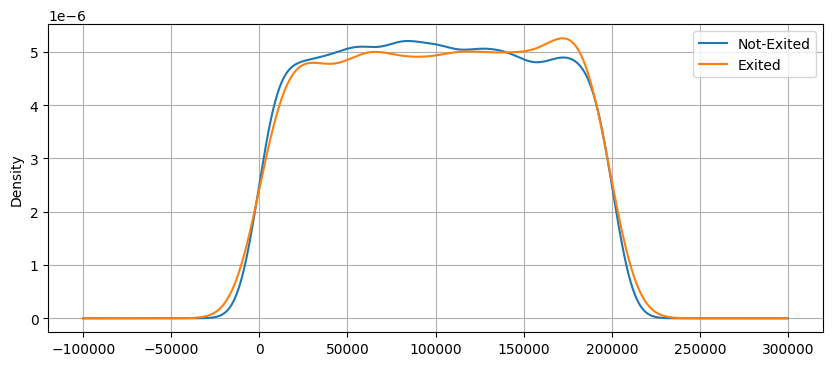

In [53]:
plt.figure(figsize=(10,4))
df[df['Exited']==0]['EstimatedSalary'].plot(kind='kde',grid=True,label='Not-Exited')
df[df['Exited']==1]['EstimatedSalary'].plot(kind='kde',grid=True,label='Exited')
plt.legend()
plt.show()

Conclusions
<li> Higher Estimated salary tend to exited</li>
<li> Lower Estimated salary tend to not-exited</li>

### Categorical - categorical Bivariate Analysis


In [58]:
plt.figure(figsize=(10,4))
pd.crosstab(df['Exited'],df['Geography'],normalize="columns")*100

Geography,France,Germany,Spain
Exited,,,
0,83.845233,67.556796,83.326605
1,16.154767,32.443204,16.673395


<Figure size 1000x400 with 0 Axes>

Conclusion:
<li> For Germeny the exited % is higher than France and Spain </li>

In [59]:
pd.crosstab(df['Exited'],df['Gender'],normalize="columns")*100

Gender,Female,Male
Exited,,
0,74.928461,83.544072
1,25.071539,16.455928


Conclusion:
<li> Females are exited more than the Males </li>

In [60]:
pd.crosstab(df['Exited'],df['NumOfProducts'],normalize="columns")*100

NumOfProducts,1,2,3,4
Exited,,,,
0,72.285602,92.418301,17.293233,0.0
1,27.714398,7.581699,82.706767,100.0


Conclusion
<li> Higher No of products tend to exit</li>
<li> The customers having product 2 exited % is less than product 1. Maybe they are males or they belongs to france or spain </li>

In [62]:
pd.crosstab(df['Exited'],df['HasCrCard'],normalize="columns")*100

HasCrCard,0,1
Exited,,
0,79.185059,79.815734
1,20.814941,20.184266


Conclusion
<li> Not so much useful feature </li>

In [64]:
pd.crosstab(df['Exited'],df['IsActiveMember'],normalize="columns")*100

IsActiveMember,0,1
Exited,,
0,73.149103,85.730926
1,26.850897,14.269074


Conclusions
<li> Active members tend to stay(not exit)</li>
<li> Non-Active members tend to Exit</li>

In [65]:
pd.crosstab(df['Exited'],df['Tenure'],normalize="columns")*100

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,76.997579,77.584541,80.820611,78.88999,79.474216,79.347826,79.731127,82.782101,80.780488,78.353659,79.387755
1,23.002421,22.415459,19.179389,21.11001,20.525784,20.652174,20.268873,17.217899,19.219512,21.646341,20.612245


Conclusions
<li> For Tenure 0 the exited probability is higher</li>
<li> For Tenure 1-10 the exited probability is almost similar</li>
<li> For Tenure 7 the exited probability is Very low maybe the customers are male or they are from france and spain or having no of products 2.</li>

In [75]:
tenure_7=df[df['Tenure']==7]

In [79]:
tenure_7['Gender'].value_counts()

Gender
Male      564
Female    464
Name: count, dtype: int64

In [80]:
tenure_7['Geography'].value_counts()

Geography
France     552
Spain      251
Germany    225
Name: count, dtype: int64

In [81]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [78]:
pd.crosstab(tenure_7['Exited'],tenure_7['Geography'],normalize="columns")*100

Geography,France,Germany,Spain
Exited,,,
0,86.231884,72.888889,84.063745
1,13.768116,27.111111,15.936255


In [85]:
tenure_7_male=df[(df['Tenure']==7) & (df['Gender']=='Male') & (df['Geography']!='Germany')]
tenure_7_male['Exited'].value_counts()

Exited
0    394
1     53
Name: count, dtype: int64

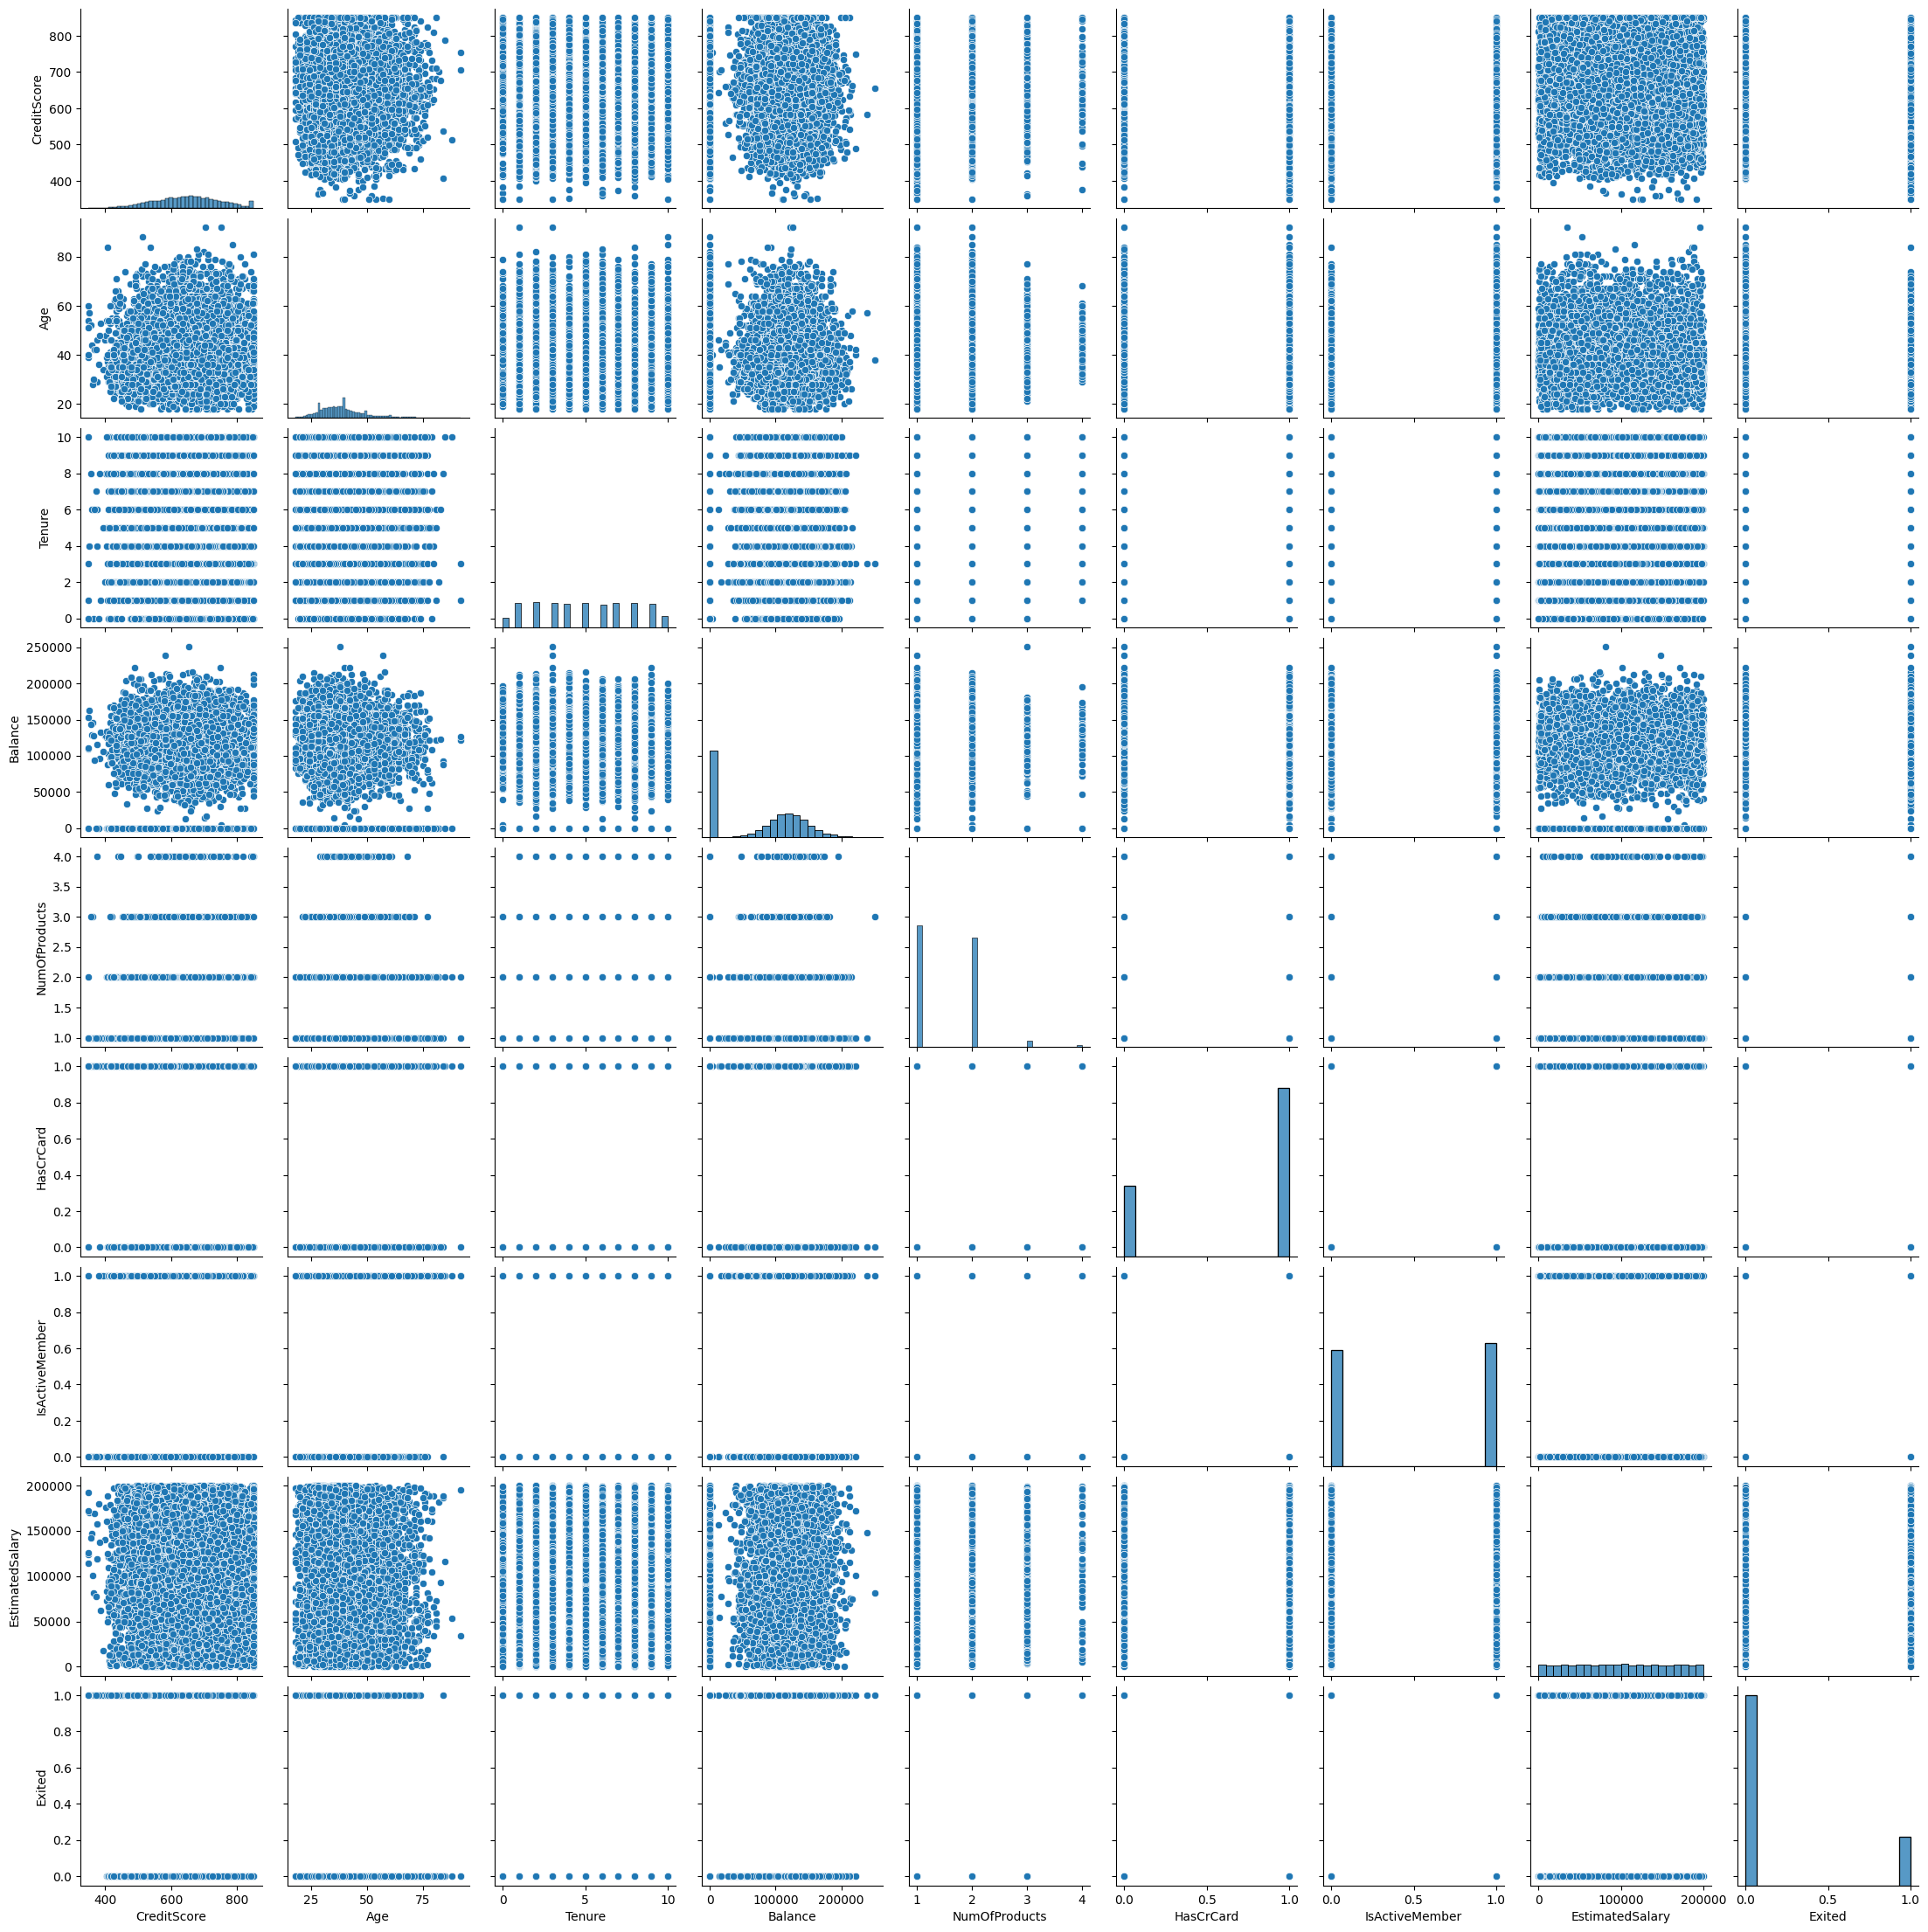

In [67]:
sns.pairplot(df)

<Axes: >

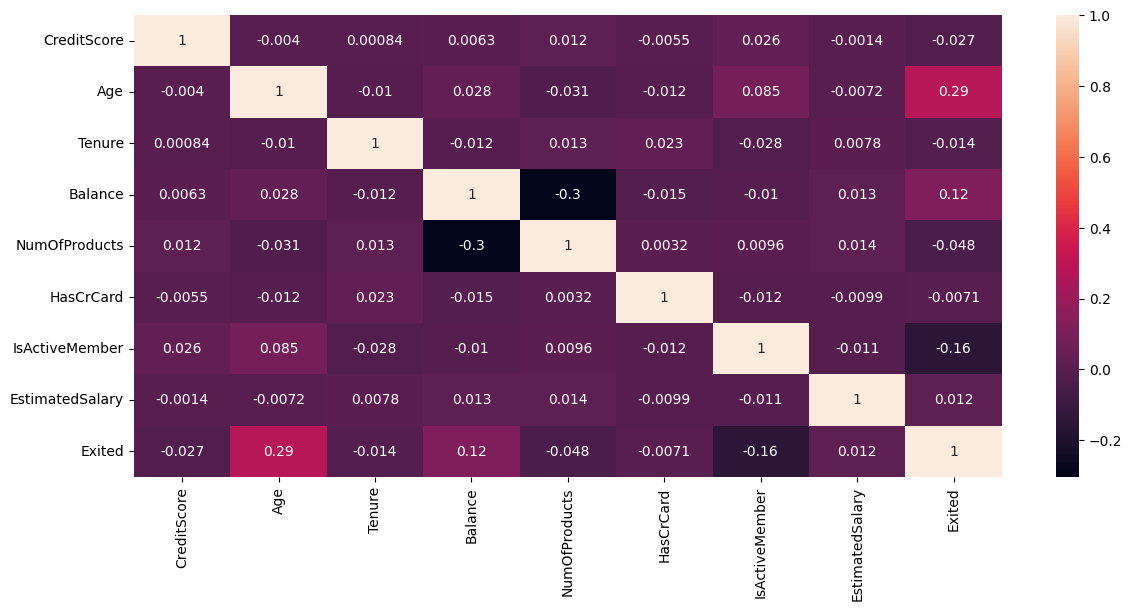

In [71]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [86]:
df.var(numeric_only=True)

CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64